## Week 5 Goals:

1. Change DASS categories into 2 categories: `0` and `1`. 
2. Redo Bottomline Models.
3. Hyperparameter Tuning
4. For each specific age range, predict DASS categories according to `orientation` + `personality`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('data.csv',sep='\t')

In [4]:
data['stress_score'] = data.apply(lambda row: row.Q1A + row.Q6A + row.Q8A + row.Q11A + row.Q12A + row.Q14A
                                       + row.Q18A + row.Q22A + row.Q27A + row.Q29A + row.Q32A + row.Q33A + row.Q35A + row.Q39A,
                                       axis=1)

In [5]:
data['stress_category'] = data["stress_score"]

In [6]:
data.loc[ data['stress_category'] <= 28, 'stress_category'] = 1
data.loc[(data['stress_category'] > 28) & (data['stress_category'] <= 32), 'stress_category'] = 2
data.loc[(data['stress_category'] > 32) & (data['stress_category'] <= 39), 'stress_category'] = 3
data.loc[(data['stress_category'] > 39) & (data['stress_category'] <= 47), 'stress_category'] = 4
data.loc[ data['stress_category'] > 47, 'stress_category'] = 5 

In [7]:
data['anxiety_score'] = data.apply(lambda row: row.Q2A + row.Q4A + row.Q7A + row.Q9A + row.Q15A + row.Q19A
                                       + row.Q20A + row.Q23A + row.Q25A + row.Q28A + row.Q30A + row.Q36A + row.Q40A + row.Q41A,
                                       axis=1)

In [8]:
data['anxiety_category'] = data['anxiety_score']

In [9]:
data.loc[ data['anxiety_category'] <= 21, 'anxiety_category'] = 1
data.loc[(data['anxiety_category'] > 21) & (data['anxiety_category'] <= 23), 'anxiety_category'] = 2
data.loc[(data['anxiety_category'] > 23) & (data['anxiety_category'] <= 28), 'anxiety_category'] = 3
data.loc[(data['anxiety_category'] > 28) & (data['anxiety_category'] <= 33), 'anxiety_category'] = 4
data.loc[ data['anxiety_category'] > 33, 'anxiety_category'] = 5 

In [10]:
data['depression_score'] = data.apply(lambda row: row.Q3A + row.Q5A + row.Q10A + row.Q13A + row.Q16A + row.Q17A
                                       + row.Q21A + row.Q24A + row.Q26A + row.Q31A + row.Q34A + row.Q37A + row.Q38A + row.Q42A,
                                       axis=1)

In [11]:
data['depression_category'] = data['depression_score']

In [12]:
data.loc[ data['depression_category'] <= 23, 'depression_category'] = 1
data.loc[(data['depression_category'] > 23) & (data['depression_category'] <= 27), 'depression_category'] = 2
data.loc[(data['depression_category'] > 27) & (data['depression_category'] <= 34), 'depression_category'] = 3
data.loc[(data['depression_category'] > 34) & (data['depression_category'] <= 41), 'depression_category'] = 4
data.loc[ data['depression_category'] > 41, 'depression_category'] = 5 

In [13]:
data['Extroversion'] = data.apply(lambda row: row.TIPI1 + 
                                  (7-row.TIPI6), axis=1)

In [14]:
data['Agreeableness'] = data.apply(lambda row: row.TIPI7 + 
                                   (7-row.TIPI2), axis=1)

In [15]:
data['Conscientiousness'] = data.apply(lambda row: row.TIPI3 + 
                                       (7-row.TIPI8), axis=1)

In [16]:
data['Emotional_stability'] = data.apply(lambda row: row.TIPI9 + 
                                         (7-row.TIPI4), axis=1)

In [17]:
data['Openness_to_experience'] = data.apply(lambda row: row.TIPI5 + 
                                            (7-row.TIPI10), axis=1)

In [18]:
data = data[data.TIPI1 != 0]
data = data[data.TIPI2 != 0]
data = data[data.TIPI3 != 0]
data = data[data.TIPI4 != 0]
data = data[data.TIPI5 != 0]
data = data[data.TIPI6 != 0]
data = data[data.TIPI7 != 0]
data = data[data.TIPI8 != 0]
data = data[data.TIPI9 != 0]
data = data[data.TIPI10 != 0]

In [19]:
data['depression_score'] = data['depression_score']-14
data['anxiety_score'] = data['anxiety_score']-14
data['stress_score'] = data['stress_score']-14

In [20]:
data.loc[data['religion']==5,'religion'] = 4
data.loc[data['religion']==6,'religion'] = 4
data.loc[data['religion']==7,'religion'] = 4

In [21]:
data = data[data.VCL6 != 1]
data = data[data.VCL9 != 1]
data = data[data.VCL12 != 1]

In [22]:
data['education_yrs'] = data['education']

In [23]:
data.loc[data['education_yrs'] == 1,'education_yrs'] = 8
data.loc[data['education_yrs'] == 2,'education_yrs'] = 12
data.loc[data['education_yrs'] == 3,'education_yrs'] = 16
data.loc[data['education_yrs'] == 4,'education_yrs'] = 19

In [24]:
data.loc[data['age']==1996,'age'] = 22
data.loc[data['age']==1998,'age'] = 20
data.loc[data['age']==1993,'age'] = 25
data.loc[data['age']==1991,'age'] = 27

data = data[data.age != 223]
data = data[data.age != 115]
data = data[data.age != 117]

In [25]:
data = data[data.familysize <= 30]

In [26]:
data = data[data.education != 0]

In [27]:
data = data[data.urban != 0]

In [28]:
data = data[data.gender != 0]
data = data[data.gender != 3]

In [29]:
data = data[data.hand != 0]

In [30]:
data = data[data.religion != 0]

In [31]:
data = data[data.orientation != 0]
data = data[data.orientation != 5]

In [32]:
data = data[data.race != 70]

In [33]:
data = data[data.married != 0]

In [34]:
data = data[data.familysize != 0]

In [35]:
data.shape

(23150, 184)

In [36]:
data.loc[data['orientation'] >= 2, 'orientation'] = 1
data.loc[data['orientation'] < 2, 'orientation'] = 0

## 1. Change DASS Categories.

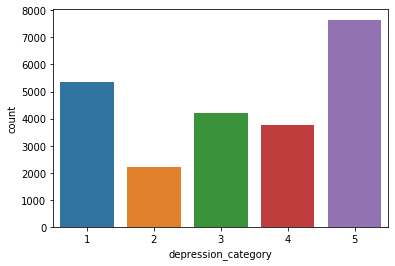

In [37]:
sns.countplot(data.depression_category)

In [38]:
data.loc[data['depression_category']==1,'depression_category'] = 0
data.loc[data['depression_category']==2,'depression_category'] = 0
data.loc[data['depression_category']==3,'depression_category'] = 0

data.loc[data['depression_category']==4,'depression_category'] = 1
data.loc[data['depression_category']==5,'depression_category'] = 1

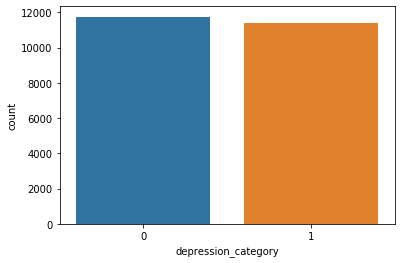

In [39]:
sns.countplot(data.depression_category)

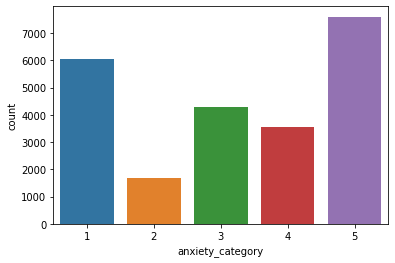

In [40]:
sns.countplot(data.anxiety_category)

In [41]:
data.loc[data['anxiety_category']==1,'anxiety_category'] = 0
data.loc[data['anxiety_category']==2,'anxiety_category'] = 0
data.loc[data['anxiety_category']==3,'anxiety_category'] = 0

data.loc[data['anxiety_category']==4,'anxiety_category'] = 1
data.loc[data['anxiety_category']==5,'anxiety_category'] = 1

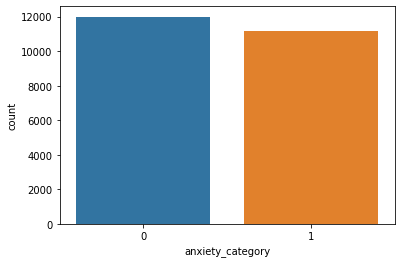

In [42]:
sns.countplot(data.anxiety_category)

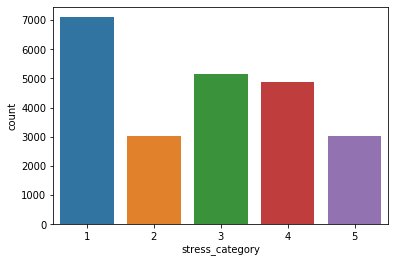

In [43]:
sns.countplot(data.stress_category)

In [44]:
data.loc[data['stress_category']==1,'stress_category'] = 0
data.loc[data['stress_category']==2,'stress_category'] = 0
data.loc[data['stress_category']==3,'stress_category'] = 0

data.loc[data['stress_category']==4,'stress_category'] = 1
data.loc[data['stress_category']==5,'stress_category'] = 1

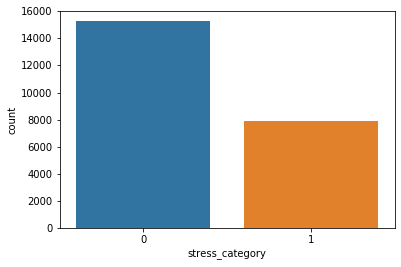

In [45]:
sns.countplot(data.stress_category)

## 2. Redo Bottomline Models

* orientation
* personality
* age
* gender
* family size

### (i) Personality

#### Depression

In [46]:
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience']

In [47]:
X_traind,X_testd,y_traind,y_testd = train_test_split(data[features],
                                                data.depression_category,
                                                test_size=0.3)

In [48]:
log_regd = LogisticRegression()

In [49]:
log_regd.fit(X_traind,y_traind)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred1 = log_regd.predict(X_testd)

In [51]:
coeff_df = pd.DataFrame(np.transpose(log_regd.coef_), X_traind.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.130781
Agreeableness,-0.041701
Conscientiousness,-0.115078
Emotional_stability,-0.293530
Openness_to_experience,-0.036860


In [52]:
accuracy_score(y_pred1,y_testd)

0.687832973362131

In [53]:
confusion_matrix(y_pred1,y_testd)

array([[2419, 1019],
       [1149, 2358]])

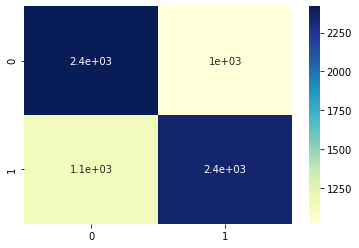

In [54]:
sns.heatmap(confusion_matrix(y_pred1,y_testd),annot=True,cmap="YlGnBu")

In [55]:
rf = RandomForestClassifier()

In [56]:
rf.fit(X_traind,y_traind)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
y_pred2 = rf.predict(X_testd)

In [58]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_traind.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.24
Variable: Agreeableness        Importance: 0.21
Variable: Openness_to_experience Importance: 0.19
Variable: Extroversion         Importance: 0.18
Variable: Conscientiousness    Importance: 0.18


In [59]:
accuracy_score(y_pred2,y_testd)

0.6636429085673146

In [60]:
confusion_matrix(y_pred2,y_testd)

array([[2371, 1139],
       [1197, 2238]])

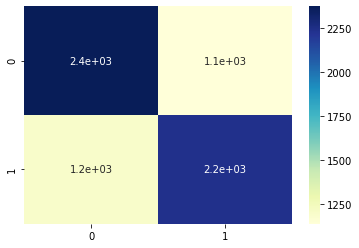

In [61]:
sns.heatmap(confusion_matrix(y_pred2,y_testd),annot=True,cmap="YlGnBu")

#### Anxiety

In [62]:
X_traina,X_testa,y_traina,y_testa = train_test_split(data[features],
                                                data.anxiety_category,
                                                test_size=0.3)

In [63]:
log_rega = LogisticRegression()

In [64]:
log_rega.fit(X_traina,y_traina)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred1 = log_rega.predict(X_testa)

In [66]:
accuracy_score(y_testa,y_pred1)

0.7002159827213823

In [67]:
confusion_matrix(y_testa,y_pred1)

array([[2504, 1071],
       [1011, 2359]])

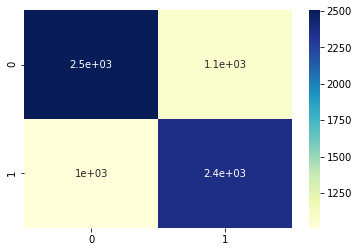

In [68]:
sns.heatmap(confusion_matrix(y_testa,y_pred1),annot=True,cmap="YlGnBu")

In [69]:
coeff_df = pd.DataFrame(np.transpose(log_rega.coef_), X_traina.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.036580
Agreeableness,0.020201
Conscientiousness,-0.060291
Emotional_stability,-0.352655
Openness_to_experience,-0.044616


In [70]:
rf2 = RandomForestClassifier()

In [71]:
rf2.fit(X_traina,y_traina)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
y_pred2 = rf2.predict(X_testa)

In [73]:
accuracy_score(y_testa,y_pred2)

0.6652267818574514

In [74]:
confusion_matrix(y_testa,y_pred2)

array([[2437, 1138],
       [1187, 2183]])

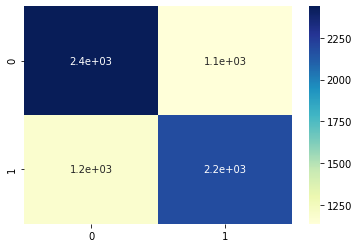

In [75]:
sns.heatmap(confusion_matrix(y_testa,y_pred2),annot=True,cmap="YlGnBu")

In [76]:
# Get numerical feature importances
importances = list(rf2.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_traina.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.26
Variable: Agreeableness        Importance: 0.21
Variable: Extroversion         Importance: 0.18
Variable: Openness_to_experience Importance: 0.18
Variable: Conscientiousness    Importance: 0.17


#### Stress

In [77]:
X_trains,X_tests,y_trains,y_tests = train_test_split(data[features],
                                                data.stress_category,
                                                test_size=0.3)

In [78]:
log_regs = LogisticRegression()

In [79]:
log_regs.fit(X_trains,y_trains)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_pred1 = log_regs.predict(X_tests)

In [81]:
accuracy_score(y_tests,y_pred1)

0.7566594672426206

In [82]:
confusion_matrix(y_tests,y_pred1)

array([[3925,  647],
       [1043, 1330]])

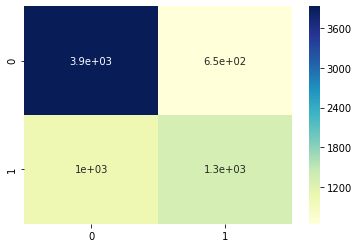

In [83]:
sns.heatmap(confusion_matrix(y_tests,y_pred1),annot=True,cmap="YlGnBu")

In [84]:
rf3 = RandomForestClassifier()

In [85]:
rf3.fit(X_trains,y_trains)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
y_pred2 = rf3.predict(X_tests)

In [87]:
confusion_matrix(y_tests,y_pred2)

array([[3760,  812],
       [1138, 1235]])

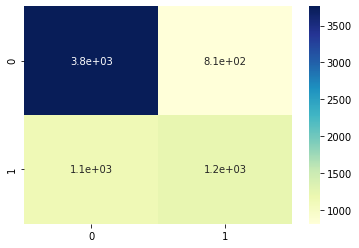

In [88]:
sns.heatmap(confusion_matrix(y_tests,y_pred2),annot=True,cmap="YlGnBu")

In [89]:
# Get numerical feature importances
importances = list(rf3.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_trains.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.3
Variable: Extroversion         Importance: 0.19
Variable: Openness_to_experience Importance: 0.18
Variable: Conscientiousness    Importance: 0.17
Variable: Agreeableness        Importance: 0.16


### (ii) Orientation + Personality

In [90]:
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','orientation']

#### Depression

In [91]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(data[features],
                                                data.depression_category,
                                                test_size=0.3)

In [92]:
log_reg1 = LogisticRegression()

In [93]:
log_reg1.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_pred1 = log_reg1.predict(X_test1)

In [95]:
accuracy_score(y_test1,y_pred1)

0.7110151187904967

In [96]:
confusion_matrix(y_test1,y_pred1)

array([[2452, 1000],
       [1007, 2486]])

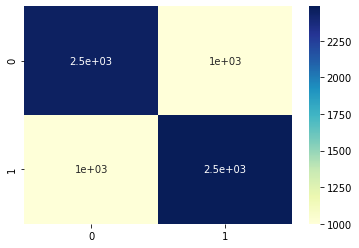

In [97]:
sns.heatmap(confusion_matrix(y_test1,y_pred1),annot=True,cmap="YlGnBu")

In [98]:
coeff_df = pd.DataFrame(np.transpose(log_reg1.coef_), X_train1.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.123698
Agreeableness,-0.038957
Conscientiousness,-0.101585
Emotional_stability,-0.287138
Openness_to_experience,-0.047910
orientation,0.000000


In [99]:
rf1 = RandomForestClassifier()

In [100]:
rf1.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
y_pred2 = rf1.predict(X_test1)

In [102]:
accuracy_score(y_test1,y_pred2)

0.6647948164146869

In [103]:
confusion_matrix(y_test1,y_pred2)

array([[2323, 1129],
       [1199, 2294]])

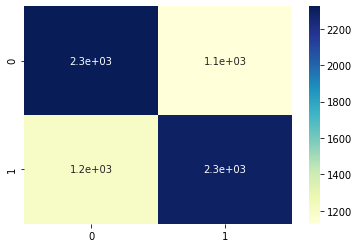

In [104]:
sns.heatmap(confusion_matrix(y_test1,y_pred2),annot=True,cmap="YlGnBu")

In [105]:
# Get numerical feature importances
importances = list(rf1.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train1.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.24
Variable: Agreeableness        Importance: 0.2
Variable: Conscientiousness    Importance: 0.19
Variable: Openness_to_experience Importance: 0.19
Variable: Extroversion         Importance: 0.18
Variable: orientation          Importance: 0.0


#### Anxiety

In [106]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(data[features],
                                                    data.anxiety_category,
                                                    test_size=0.3)

In [107]:
log_reg2 = LogisticRegression()

In [108]:
log_reg2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
y_pred3 = log_reg2.predict(X_test2)

In [110]:
accuracy_score(y_test2,y_pred3)

0.7078473722102232

In [111]:
confusion_matrix(y_test2,y_pred3)

array([[2503, 1091],
       [ 938, 2413]])

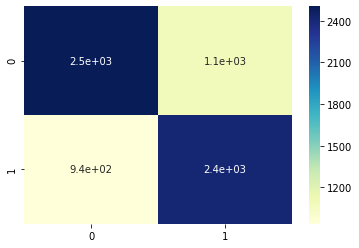

In [112]:
sns.heatmap(confusion_matrix(y_test2,y_pred3),annot=True,cmap="YlGnBu")

In [113]:
coeff_df = pd.DataFrame(np.transpose(log_reg2.coef_), X_train2.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.036633
Agreeableness,0.017222
Conscientiousness,-0.057673
Emotional_stability,-0.352928
Openness_to_experience,-0.048124
orientation,0.000000


In [114]:
rf2 = RandomForestClassifier()

In [115]:
rf2.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
y_pred4 = rf2.predict(X_test2)

In [117]:
accuracy_score(y_test2,y_pred4)

0.6701223902087833

In [118]:
confusion_matrix(y_test2,y_pred4)

array([[2463, 1131],
       [1160, 2191]])

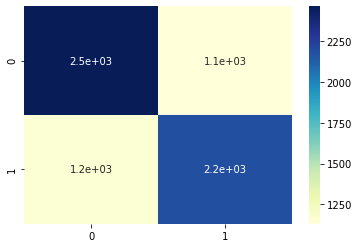

In [119]:
sns.heatmap(confusion_matrix(y_test2,y_pred4),annot=True,cmap="YlGnBu")

In [120]:
# Get numerical feature importances
importances = list(rf2.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train2.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.27
Variable: Agreeableness        Importance: 0.2
Variable: Extroversion         Importance: 0.18
Variable: Openness_to_experience Importance: 0.18
Variable: Conscientiousness    Importance: 0.17
Variable: orientation          Importance: 0.0


#### Stress

In [121]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(data[features],
                                                    data.stress_category,
                                                    test_size=0.3)

In [122]:
log_reg3 = LogisticRegression()

In [123]:
log_reg3.fit(X_train3,y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
y_pred5 = log_reg3.predict(X_test3)

In [125]:
accuracy_score(y_test3,y_pred5)

0.7566594672426206

In [126]:
confusion_matrix(y_test3,y_pred5)

array([[3907,  718],
       [ 972, 1348]])

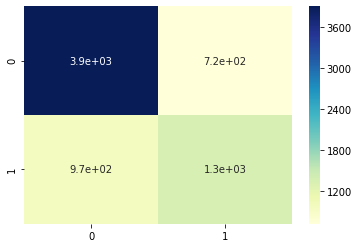

In [127]:
sns.heatmap(confusion_matrix(y_test3,y_pred5),annot=True,cmap="YlGnBu")

In [128]:
coeff_df = pd.DataFrame(np.transpose(log_reg3.coef_), X_train1.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.033703
Agreeableness,-0.058089
Conscientiousness,-0.017450
Emotional_stability,-0.462662
Openness_to_experience,-0.020879
orientation,0.000000


In [129]:
rf3 = RandomForestClassifier()

In [130]:
rf3.fit(X_train3,y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
y_pred6 = rf3.predict(X_test3)

In [132]:
accuracy_score(y_test3,y_pred6)

0.7252699784017279

In [133]:
confusion_matrix(y_test3,y_pred6)

array([[3799,  826],
       [1082, 1238]])

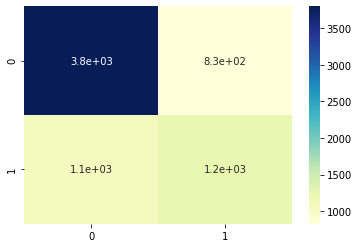

In [134]:
sns.heatmap(confusion_matrix(y_test3,y_pred6),annot=True,cmap="YlGnBu")

In [135]:
# Get numerical feature importances
importances = list(rf3.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train3.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.31
Variable: Extroversion         Importance: 0.18
Variable: Openness_to_experience Importance: 0.18
Variable: Conscientiousness    Importance: 0.17
Variable: Agreeableness        Importance: 0.16
Variable: orientation          Importance: 0.0


### (iii) Orientation + Personality + Age

In [136]:
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','orientation','age']

#### Depression

In [137]:
X_train4,X_test4,y_train4,y_test4 = train_test_split(data[features],
                                                    data.depression_category,
                                                    test_size=0.3)

In [138]:
log_reg4 = LogisticRegression()

In [139]:
log_reg4.fit(X_train4,y_train4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
y_pred7 = log_reg4.predict(X_test4)

In [141]:
accuracy_score(y_pred7,y_test4)

0.693016558675306

In [142]:
confusion_matrix(y_pred7,y_test4)

array([[2447,  981],
       [1151, 2366]])

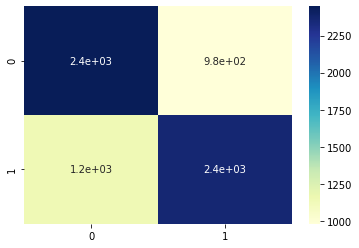

In [143]:
sns.heatmap(confusion_matrix(y_pred7,y_test4),annot=True,cmap="YlGnBu")

In [144]:
coeff_df = pd.DataFrame(np.transpose(log_reg4.coef_), X_train4.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.137797
Agreeableness,-0.040019
Conscientiousness,-0.104030
Emotional_stability,-0.292799
Openness_to_experience,-0.037365
orientation,0.000000
age,-0.003937


In [145]:
rf4 = RandomForestClassifier()

In [146]:
rf4.fit(X_train4,y_train4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [147]:
y_pred8 = rf4.predict(X_test4)

In [148]:
accuracy_score(y_pred8,y_test4)

0.676889848812095

In [149]:
confusion_matrix(y_pred8,y_test4)

array([[2450, 1096],
       [1148, 2251]])

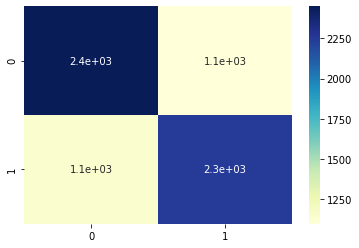

In [150]:
sns.heatmap(confusion_matrix(y_pred8,y_test4),annot=True,cmap="YlGnBu")

In [151]:
# Get numerical feature importances
importances = list(rf4.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train4.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.22
Variable: age                  Importance: 0.2
Variable: Extroversion         Importance: 0.15
Variable: Conscientiousness    Importance: 0.15
Variable: Agreeableness        Importance: 0.14
Variable: Openness_to_experience Importance: 0.14
Variable: orientation          Importance: 0.0


#### Anxiety

In [152]:
X_train5,X_test5,y_train5,y_test5 = train_test_split(data[features],
                                                    data.anxiety_category,
                                                    test_size=0.3)

In [153]:
log_reg5 = LogisticRegression()

In [154]:
log_reg5.fit(X_train5,y_train5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
y_pred9 = log_reg5.predict(X_test5)

In [156]:
accuracy_score(y_pred9,y_test5)

0.7166306695464363

In [157]:
confusion_matrix(y_pred9,y_test5)

array([[2531,  957],
       [1011, 2446]])

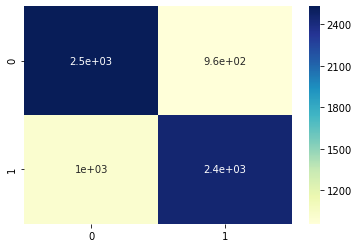

In [158]:
sns.heatmap(confusion_matrix(y_pred9,y_test5),annot=True,cmap="YlGnBu")

In [159]:
coeff_df = pd.DataFrame(np.transpose(log_reg5.coef_), X_train5.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.038866
Agreeableness,0.035452
Conscientiousness,-0.037684
Emotional_stability,-0.354077
Openness_to_experience,-0.038042
orientation,0.000000
age,-0.043509


In [160]:
rf5 = RandomForestClassifier()

In [161]:
rf5.fit(X_train5,y_train5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
y_pred10 = rf5.predict(X_test5)

In [163]:
accuracy_score(y_pred10,y_test5)

0.6868250539956804

In [164]:
confusion_matrix(y_pred10,y_test5)

array([[2507, 1140],
       [1035, 2263]])

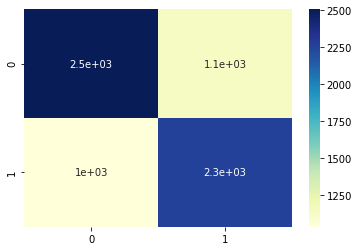

In [165]:
sns.heatmap(confusion_matrix(y_pred10,y_test5),annot=True,cmap="YlGnBu")

In [166]:
# Get numerical feature importances
importances = list(rf5.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train5.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.25
Variable: age                  Importance: 0.2
Variable: Extroversion         Importance: 0.14
Variable: Agreeableness        Importance: 0.14
Variable: Conscientiousness    Importance: 0.14
Variable: Openness_to_experience Importance: 0.13
Variable: orientation          Importance: 0.0


#### Stress

In [167]:
X_train6,X_test6,y_train6,y_test6 = train_test_split(data[features],
                                                    data.stress_category,
                                                    test_size=0.3)

In [168]:
log_reg6 = LogisticRegression()

In [169]:
log_reg6.fit(X_train6,y_train6)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
y_pred11 = log_reg6.predict(X_test6)

In [171]:
accuracy_score(y_pred11,y_test6)

0.758963282937365

In [172]:
confusion_matrix(y_pred11,y_test6)

array([[3868,  988],
       [ 686, 1403]])

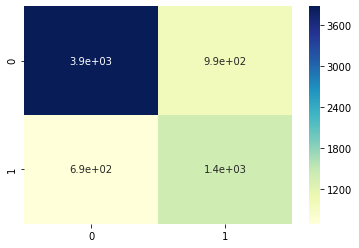

In [173]:
sns.heatmap(confusion_matrix(y_pred11,y_test6),annot=True,cmap="YlGnBu")

In [174]:
coeff_df = pd.DataFrame(np.transpose(log_reg5.coef_), X_train5.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.038866
Agreeableness,0.035452
Conscientiousness,-0.037684
Emotional_stability,-0.354077
Openness_to_experience,-0.038042
orientation,0.000000
age,-0.043509


In [175]:
rf6 = RandomForestClassifier()

In [176]:
rf6.fit(X_train6,y_train6)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [177]:
y_pred12 = rf6.predict(X_test6)

In [178]:
accuracy_score(y_pred12,y_test6)

0.7392368610511159

In [179]:
confusion_matrix(y_pred12,y_test6)

array([[3855, 1112],
       [ 699, 1279]])

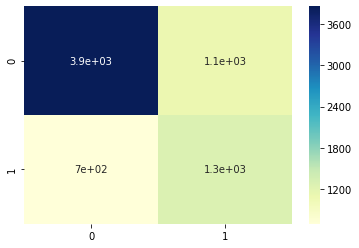

In [180]:
sns.heatmap(confusion_matrix(y_pred12,y_test6),annot=True,cmap="YlGnBu")

In [181]:
# Get numerical feature importances
importances = list(rf6.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train6.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.28
Variable: age                  Importance: 0.19
Variable: Extroversion         Importance: 0.13
Variable: Agreeableness        Importance: 0.13
Variable: Conscientiousness    Importance: 0.13
Variable: Openness_to_experience Importance: 0.13
Variable: orientation          Importance: 0.0


### (iv) Personality + Age + Gender

In [182]:
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','age','gender']

#### Depression

In [183]:
X_train7,X_test7,y_train7,y_test7 = train_test_split(data[features],
                                                    data.depression_category,
                                                    test_size=0.3)

In [184]:
log_reg7 = LogisticRegression()

In [185]:
log_reg7.fit(X_train7,y_train7)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
y_pred13 = log_reg7.predict(X_test7)

In [187]:
accuracy_score(y_pred13,y_test7)

0.7005039596832253

In [188]:
confusion_matrix(y_pred13,y_test7)

array([[2448, 1034],
       [1046, 2417]])

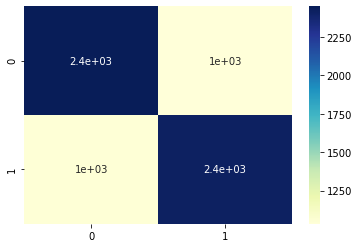

In [189]:
sns.heatmap(confusion_matrix(y_pred13,y_test7),annot=True,cmap="YlGnBu")

In [190]:
coeff_df = pd.DataFrame(np.transpose(log_reg7.coef_), X_train7.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.129637
Agreeableness,-0.044990
Conscientiousness,-0.102023
Emotional_stability,-0.289856
Openness_to_experience,-0.040742
age,-0.005345
gender,-0.153742


In [191]:
rf7 = RandomForestClassifier()

In [192]:
rf7.fit(X_train7,y_train7)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
y_pred14 = rf7.predict(X_test7)

In [194]:
accuracy_score(y_pred14,y_test7)

0.6825053995680346

In [195]:
confusion_matrix(y_pred14,y_test7)

array([[2421, 1132],
       [1073, 2319]])

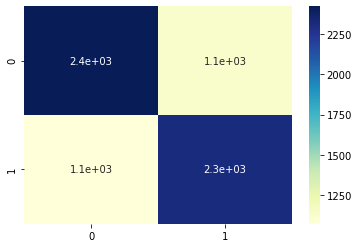

In [196]:
sns.heatmap(confusion_matrix(y_pred14,y_test7),annot=True,cmap="YlGnBu")

In [197]:
# Get numerical feature importances
importances = list(rf7.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train7.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.22
Variable: age                  Importance: 0.2
Variable: Extroversion         Importance: 0.14
Variable: Agreeableness        Importance: 0.14
Variable: Conscientiousness    Importance: 0.14
Variable: Openness_to_experience Importance: 0.14
Variable: gender               Importance: 0.03


#### Anxiety

In [198]:
X_train8,X_test8,y_train8,y_test8 = train_test_split(data[features],
                                                    data.anxiety_category,
                                                    test_size=0.3)

In [199]:
log_reg8 = LogisticRegression()

In [200]:
log_reg8.fit(X_train8,y_train8)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
y_pred15 = log_reg8.predict(X_test8)

In [202]:
accuracy_score(y_pred15,y_test8)

0.7101511879049676

In [203]:
confusion_matrix(y_pred15,y_test8)

array([[2546,  964],
       [1049, 2386]])

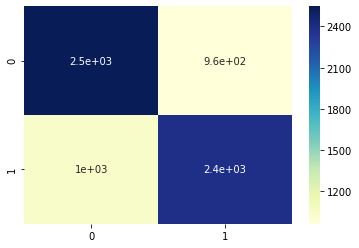

In [204]:
sns.heatmap(confusion_matrix(y_pred15,y_test8),annot=True,cmap="YlGnBu")

In [205]:
coeff_df = pd.DataFrame(np.transpose(log_reg8.coef_), X_train8.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.048436
Agreeableness,0.021596
Conscientiousness,-0.041309
Emotional_stability,-0.348759
Openness_to_experience,-0.034060
age,-0.043328
gender,0.252612


In [206]:
rf8 = RandomForestClassifier()

In [207]:
rf8.fit(X_train8,y_train8)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [208]:
y_pred16 = rf8.predict(X_test8)

In [209]:
accuracy_score(y_pred16,y_test8)

0.6958963282937365

In [210]:
confusion_matrix(y_pred16,y_test8)

array([[2534, 1051],
       [1061, 2299]])

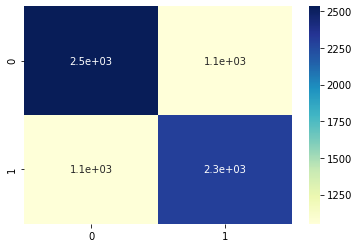

In [211]:
sns.heatmap(confusion_matrix(y_pred16,y_test8),annot=True,cmap="YlGnBu")

In [212]:
# Get numerical feature importances
importances = list(rf8.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train8.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.24
Variable: age                  Importance: 0.19
Variable: Extroversion         Importance: 0.14
Variable: Agreeableness        Importance: 0.14
Variable: Conscientiousness    Importance: 0.13
Variable: Openness_to_experience Importance: 0.13
Variable: gender               Importance: 0.02


#### Stress

In [213]:
X_train9,X_test9,y_train9,y_test9 = train_test_split(data[features],
                                                    data.stress_category,
                                                    test_size=0.3)

In [214]:
log_reg9 = LogisticRegression()

In [215]:
log_reg9.fit(X_train9,y_train9)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
y_pred17 = log_reg9.predict(X_test9)

In [217]:
accuracy_score(y_pred17,y_test9)

0.7568034557235421

In [218]:
confusion_matrix(y_pred17,y_test9)

array([[3942, 1093],
       [ 596, 1314]])

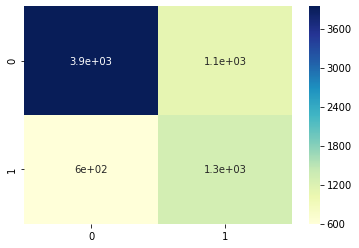

In [219]:
sns.heatmap(confusion_matrix(y_pred17,y_test9),annot=True,cmap="YlGnBu")

In [220]:
coeff_df = pd.DataFrame(np.transpose(log_reg9.coef_), X_train9.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.041527
Agreeableness,-0.060048
Conscientiousness,-0.015751
Emotional_stability,-0.455668
Openness_to_experience,-0.017701
age,-0.010565
gender,0.347316


In [221]:
rf9 = RandomForestClassifier()

In [222]:
rf9.fit(X_train9,y_train9)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
y_pred18 = rf9.predict(X_test9)

In [224]:
accuracy_score(y_pred18,y_test9)

0.7451403887688985

In [225]:
confusion_matrix(y_pred18,y_test9)

array([[3914, 1146],
       [ 624, 1261]])

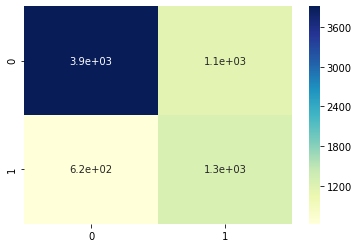

In [226]:
sns.heatmap(confusion_matrix(y_pred18,y_test9),annot=True,cmap="YlGnBu")

In [227]:
# Get numerical feature importances
importances = list(rf8.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train8.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.24
Variable: age                  Importance: 0.19
Variable: Extroversion         Importance: 0.14
Variable: Agreeableness        Importance: 0.14
Variable: Conscientiousness    Importance: 0.13
Variable: Openness_to_experience Importance: 0.13
Variable: gender               Importance: 0.02


### (v) Orientation + Personality + Age + Gender + Family Size

In [228]:
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','orientation',
            'age','gender','familysize']

#### Depression

In [229]:
X_train10,X_test10,y_train10,y_test10 = train_test_split(data[features],
                                                        data.depression_category,
                                                        test_size=0.3)

In [230]:
log_reg10 = LogisticRegression()

In [231]:
log_reg10.fit(X_train10,y_train10)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [232]:
y_pred19 = log_reg10.predict(X_test10)

In [233]:
accuracy_score(y_pred19,y_test10)

0.7062634989200864

In [234]:
confusion_matrix(y_pred19,y_test10)

array([[2481,  975],
       [1065, 2424]])

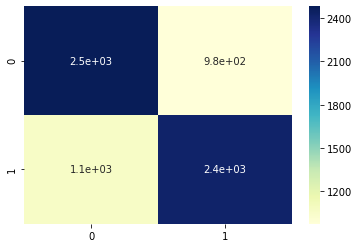

In [235]:
sns.heatmap(confusion_matrix(y_pred19,y_test10),annot=True,cmap="YlGnBu")

In [236]:
coeff_df = pd.DataFrame(np.transpose(log_reg10.coef_), X_train10.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.130067
Agreeableness,-0.039382
Conscientiousness,-0.100687
Emotional_stability,-0.288177
Openness_to_experience,-0.037209
orientation,0.000000
age,-0.001482
gender,-0.106747
familysize,-0.005855


In [237]:
rf10 = RandomForestClassifier()

In [238]:
rf10.fit(X_train10,y_train10)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [239]:
y_pred20 = rf10.predict(X_test10)

In [240]:
accuracy_score(y_pred20,y_test10)

0.6920086393088553

In [241]:
confusion_matrix(y_pred20,y_test10)

array([[2505, 1098],
       [1041, 2301]])

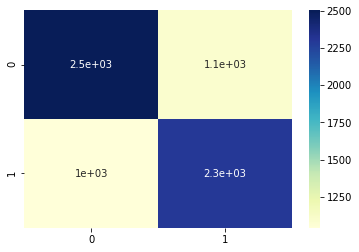

In [242]:
sns.heatmap(confusion_matrix(y_pred20,y_test10),annot=True,cmap="YlGnBu")

In [243]:
# Get numerical feature importances
importances = list(rf10.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train10.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.2
Variable: age                  Importance: 0.17
Variable: Extroversion         Importance: 0.13
Variable: Conscientiousness    Importance: 0.13
Variable: Agreeableness        Importance: 0.12
Variable: Openness_to_experience Importance: 0.12
Variable: familysize           Importance: 0.1
Variable: gender               Importance: 0.03
Variable: orientation          Importance: 0.0


#### Anxiety

In [244]:
X_train11,X_test11,y_train11,y_test11 = train_test_split(data[features],
                                                        data.anxiety_category,
                                                        test_size=0.3)

In [245]:
log_reg11 = LogisticRegression()

In [246]:
log_reg11.fit(X_train11,y_train11)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [247]:
y_pred21 = log_reg11.predict(X_test11)

In [248]:
accuracy_score(y_pred21,y_test11)

0.7140388768898488

In [249]:
confusion_matrix(y_pred21,y_test11)

array([[2537,  894],
       [1092, 2422]])

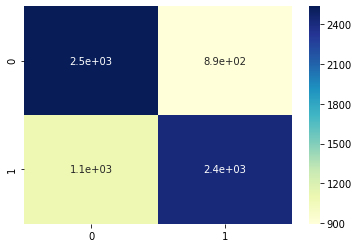

In [250]:
sns.heatmap(confusion_matrix(y_pred21,y_test11),annot=True,cmap="YlGnBu")

In [251]:
coeff_df = pd.DataFrame(np.transpose(log_reg11.coef_), X_train11.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.042953
Agreeableness,0.026856
Conscientiousness,-0.047743
Emotional_stability,-0.352202
Openness_to_experience,-0.029415
orientation,0.000000
age,-0.041176
gender,0.213107
familysize,0.075386


In [252]:
rf11 = RandomForestClassifier()

In [253]:
rf11.fit(X_train11,y_train11)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [254]:
y_pred22 = rf11.predict(X_test11)

In [255]:
accuracy_score(y_pred22,y_test11)

0.6986321094312455

In [256]:
confusion_matrix(y_pred22,y_test11)

array([[2558, 1022],
       [1071, 2294]])

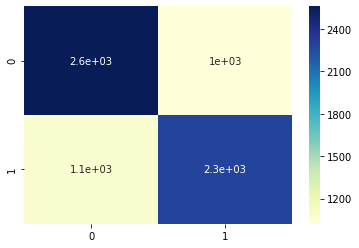

In [257]:
sns.heatmap(confusion_matrix(y_pred22,y_test11),annot=True,cmap="YlGnBu")

In [258]:
# Get numerical feature importances
importances = list(rf11.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train11.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.23
Variable: age                  Importance: 0.17
Variable: Extroversion         Importance: 0.12
Variable: Agreeableness        Importance: 0.12
Variable: Conscientiousness    Importance: 0.12
Variable: Openness_to_experience Importance: 0.12
Variable: familysize           Importance: 0.1
Variable: gender               Importance: 0.02
Variable: orientation          Importance: 0.0


#### Stress

In [259]:
X_train12,X_test12,y_train12,y_test12 = train_test_split(data[features],
                                                        data.stress_category,
                                                        test_size=0.3)

In [260]:
log_reg12 = LogisticRegression()

In [261]:
log_reg12.fit(X_train12,y_train12)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [262]:
y_pred23 = log_reg12.predict(X_test12)

In [263]:
accuracy_score(y_pred23,y_test12)

0.7533477321814255

In [264]:
confusion_matrix(y_pred23,y_test12)

array([[3851,  998],
       [ 715, 1381]])

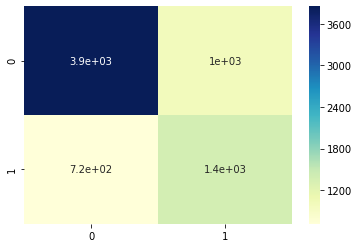

In [265]:
sns.heatmap(confusion_matrix(y_pred23,y_test12),annot=True,cmap="YlGnBu")

In [266]:
coeff_df = pd.DataFrame(np.transpose(log_reg12.coef_), X_train12.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Extroversion,-0.035996
Agreeableness,-0.055545
Conscientiousness,-0.017677
Emotional_stability,-0.464500
Openness_to_experience,-0.019903
orientation,0.000000
age,-0.008610
gender,0.301044
familysize,0.034095


In [267]:
rf12 = RandomForestClassifier()

In [268]:
rf12.fit(X_train12,y_train12)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [269]:
y_pred24 = rf12.predict(X_test12)

In [270]:
accuracy_score(y_pred24,y_test12)

0.7445644348452124

In [271]:
confusion_matrix(y_pred24,y_test12)

array([[3912, 1120],
       [ 654, 1259]])

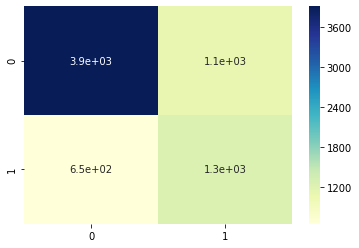

In [272]:
sns.heatmap(confusion_matrix(y_pred24,y_test12),annot=True,cmap="YlGnBu")

In [273]:
# Get numerical feature importances
importances = list(rf12.feature_importances_)

# List of tuples with variable and importance
feature_list = list(X_train12.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Emotional_stability  Importance: 0.28
Variable: age                  Importance: 0.16
Variable: Extroversion         Importance: 0.12
Variable: Conscientiousness    Importance: 0.12
Variable: Openness_to_experience Importance: 0.12
Variable: Agreeableness        Importance: 0.1
Variable: familysize           Importance: 0.1
Variable: gender               Importance: 0.02
Variable: orientation          Importance: 0.0


## 3. Hyperparameter Tuning 

* Personality
* Personality + Orientation 
* Personality + Age + Gender
* Personality + Age + Gender + Family Size

In [274]:
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

### (i) Personality

In [275]:
from sklearn.model_selection import RandomizedSearchCV

#### Depression

In [276]:
c = [0.01,0.1,1,10]
penalty = ['l1','l2']
random_grid = {'C':c,
               'penalty':penalty
}
print(random_grid)

{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}


In [277]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_traind, y_traind)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [278]:
y_predd = lr_random.predict(X_testd)

In [279]:
accuracy_score(y_testd,y_predd)

0.6879769618430526

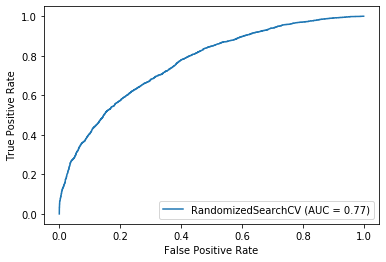

In [280]:
plot_roc_curve(lr_random, X_testd, y_testd)

In [281]:
# Number of trees in random forest
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [282]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_traind, y_traind)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [283]:
y_predd = rf_random.predict(X_testd)

In [284]:
accuracy_score(y_predd,y_testd)

0.6925845932325414

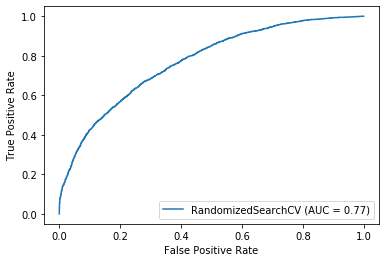

In [285]:
plot_roc_curve(rf_random, X_testd, y_testd)

#### Anxiety

In [286]:
c = [0.01,0.1,1,10]
penalty = ['l1','l2']
random_grid = {'C':c,
               'penalty':penalty
}
print(random_grid)

{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}


In [287]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_traina, y_traina)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [288]:
y_preda = lr_random.predict(X_testa)

In [289]:
accuracy_score(y_preda,y_testa)

0.7002159827213823

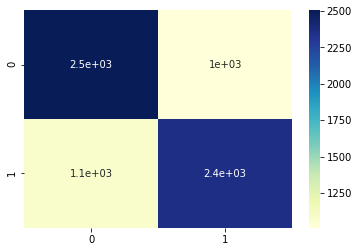

In [290]:
sns.heatmap(confusion_matrix(y_preda,y_testa),annot=True,cmap="YlGnBu")

In [291]:
# Number of trees in random forest
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [292]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_traina, y_traina)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [293]:
y_preda = rf_random.predict(X_testa)

In [294]:
accuracy_score(y_preda,y_testa)

0.6967602591792657

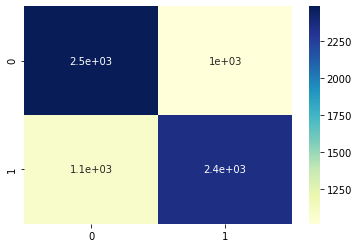

In [295]:
sns.heatmap(confusion_matrix(y_preda,y_testa),annot=True,cmap="YlGnBu")

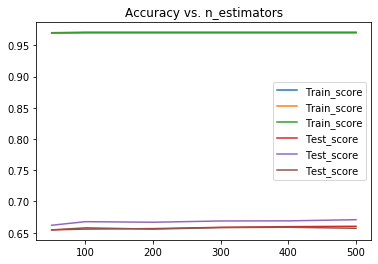

In [296]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_traina, y=y_traina,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                cv=3)

param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()

#### Stress

In [297]:
c = [0.01,0.1,1,10]
penalty = ['l1','l2']
random_grid = {'C':c,
               'penalty':penalty
}
print(random_grid)

{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}


In [298]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_trains, y_trains)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [299]:
y_preds = lr_random.predict(X_tests)

In [300]:
accuracy_score(y_preds,y_tests)

0.7568034557235421

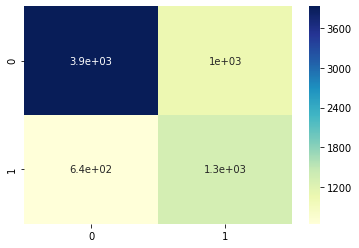

In [301]:
sns.heatmap(confusion_matrix(y_preds,y_tests),annot=True,cmap="YlGnBu")

In [302]:
# Number of trees in random forest
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [303]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_trains, y_trains)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [304]:
y_preds = rf_random.predict(X_tests)

In [305]:
accuracy_score(y_preds,y_tests)

0.7582433405327573

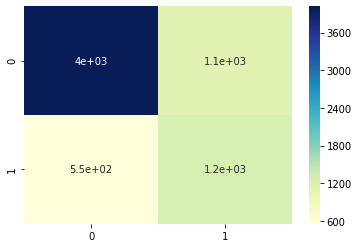

In [306]:
sns.heatmap(confusion_matrix(y_preds,y_tests),annot=True,cmap="YlGnBu")

In [307]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_trains, y=y_trains,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                 cv=3)

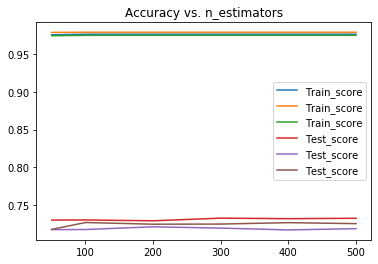

In [308]:
param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()

### (ii) Orientation + Personality

#### Depression

In [309]:
c = [0.01,0.1,1,10]
penalty = ['l1','l2']
random_grid = {'C':c,
               'penalty':penalty
}
print(random_grid)

{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}


In [310]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_train1, y_train1)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [311]:
y_predd = lr_random.predict(X_test1)

In [312]:
accuracy_score(y_predd,y_test1)

0.7113030957523399

In [313]:
# Number of trees in random forest
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [314]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train1, y_train1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [315]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [316]:
y_predd = rf_random.predict(X_test1)

In [317]:
accuracy_score(y_predd,y_test1)

0.7077033837293016

#### Anxiety

In [318]:
c = [0.01,0.1,1,10]
penalty = ['l1','l2']
random_grid = {'C':c,
               'penalty':penalty
}
print(random_grid)

{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}


In [319]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_train2, y_train2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [320]:
y_preda = lr_random.predict(X_test2)

In [321]:
accuracy_score(y_preda,y_test2)

0.7078473722102232

In [322]:
# Number of trees in random forest
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [323]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train2, y_train2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [324]:
y_preda = rf_random.predict(X_test2)

In [325]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [326]:
accuracy_score(y_preda,y_test2)

0.7023758099352052

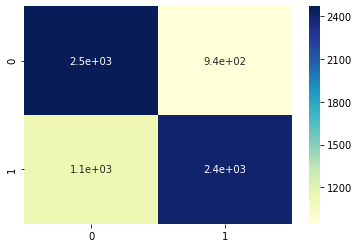

In [327]:
sns.heatmap(confusion_matrix(y_preda,y_test2),annot=True,cmap="YlGnBu")

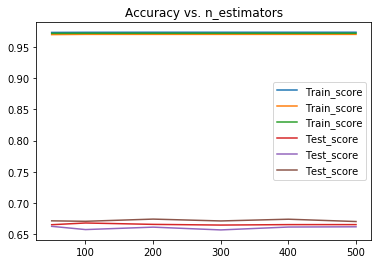

In [328]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_train2, y=y_train2,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                 cv=3)

param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()

#### Stress

In [329]:
c = [0.01,0.1,1,10]
penalty = ['l1','l2']
random_grid = {'C':c,
               'penalty':penalty
}
print(random_grid)

{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}


In [330]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_train3, y_train3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [331]:
y_preds = lr_random.predict(X_test3)

In [332]:
accuracy_score(y_preds,y_test3)

0.7565154787616991

In [333]:
# Number of trees in random forest
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [334]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train3, y_train3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [335]:
y_preds = rf_random.predict(X_test3)

In [336]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [337]:
accuracy_score(y_preds,y_test3)

0.7557955363570914

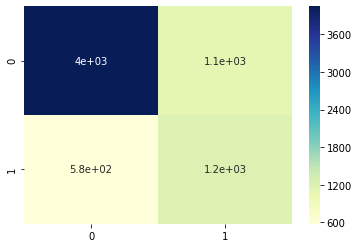

In [338]:
sns.heatmap(confusion_matrix(y_preds,y_test3),annot=True,cmap="YlGnBu")

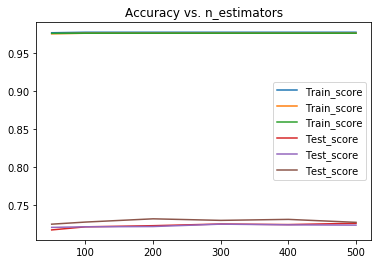

In [339]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_train3, y=y_train3,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                 cv=3)

param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()

### (iii) Personality + Age + Gender

#### Depression

In [340]:
random_grid = {'C':c,
               'penalty':penalty
}

In [341]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_train7, y_train7)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.5s


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [342]:
y_pred = lr_random.predict(X_test7)

In [343]:
accuracy_score(y_pred,y_test7)

0.6996400287976962

In [344]:
train_score, test_score = validation_curve(LogisticRegression(),
                                            X=X_train7, y=y_train7,
                                            param_name='class_weight',
                                            param_range=[0.2,0.4,0.6,0.8,1.0],
                                            cv=3)

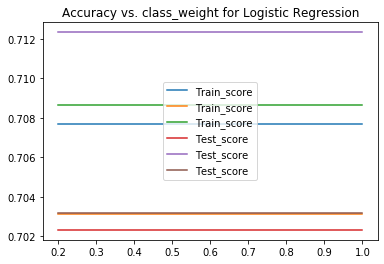

In [345]:
param_range=[0.2,0.4,0.6,0.8,1.0]
plt.plot(param_range, train_score,label='Train_score')
plt.plot(param_range, test_score,label='Test_score')
plt.legend()
plt.title("Accuracy vs. class_weight for Logistic Regression")
plt.show()

In [346]:
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [347]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train7, y_train7)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [348]:
y_preds = rf_random.predict(X_test7)

In [349]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [350]:
accuracy_score(y_preds,y_test7)

0.7041036717062635

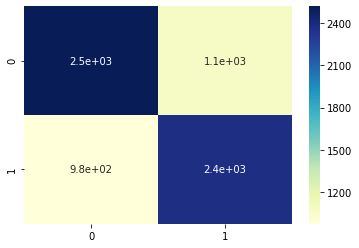

In [351]:
sns.heatmap(confusion_matrix(y_preds,y_test7),annot=True,cmap="YlGnBu")

In [352]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_train7, y=y_train7,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                 cv=3)

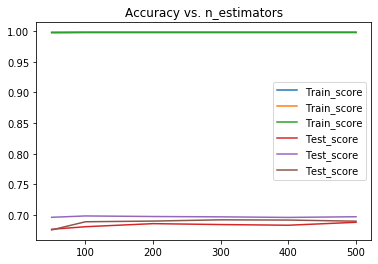

In [353]:
param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()

In [354]:
train_score1, test_score1 = validation_curve(RandomForestClassifier(),
                                                X=X_train7, y=y_train7,
                                                param_name='max_depth',
                                                param_range=[10,50,100],
                                                 cv=3)

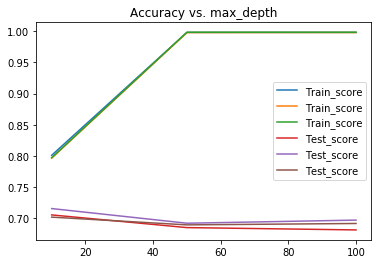

In [355]:
param_range=[10,50,100]
plt.plot(param_range, train_score1,label='Train_score')
plt.plot(param_range, test_score1,label='Test_score')
plt.legend()
plt.title("Accuracy vs. max_depth")
plt.show()

In [356]:
min_samples_split = [2, 5, 10]
train_score2, test_score2 = validation_curve(RandomForestClassifier(),
                                                X=X_train7, y=y_train7,
                                                param_name='min_samples_split',
                                                param_range=min_samples_split,
                                                 cv=3)

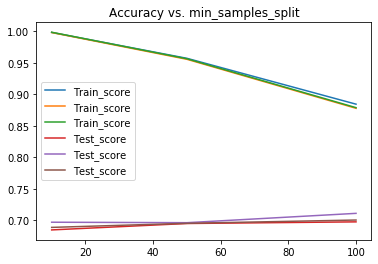

In [357]:
plt.plot(param_range, train_score2,label='Train_score')
plt.plot(param_range, test_score2,label='Test_score')
plt.legend()
plt.title("Accuracy vs. min_samples_split")
plt.show()

#### Anxiety

In [358]:
random_grid = {'C':c,
               'penalty':penalty
}

In [359]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_train8, y_train8)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.4s


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [360]:
y_pred = lr_random.predict(X_test8)

In [361]:
accuracy_score(y_pred,y_test8)

0.7102951763858891

In [362]:
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [363]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train8, y_train8)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [364]:
y_preds = rf_random.predict(X_test8)

In [365]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [366]:
accuracy_score(y_preds,y_test8)

0.7118790496760259

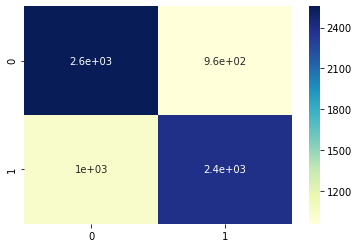

In [367]:
sns.heatmap(confusion_matrix(y_preds,y_test8),annot=True,cmap="YlGnBu")

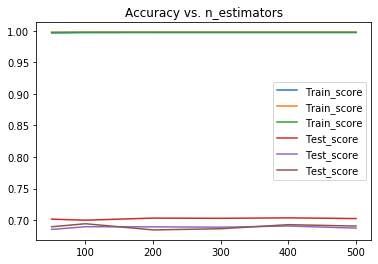

In [368]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_train8, y=y_train8,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                 cv=3)

param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()

#### Stress

In [369]:
random_grid = {'C':c,
               'penalty':penalty
}

In [370]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_train9, y_train9)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.7s


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [371]:
y_pred = lr_random.predict(X_test9)

In [372]:
accuracy_score(y_pred,y_test9)

0.7565154787616991

In [373]:
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [374]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train9, y_train9)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [375]:
y_preds = rf_random.predict(X_test9)

In [376]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [377]:
accuracy_score(y_preds,y_test9)

0.7579553635709143

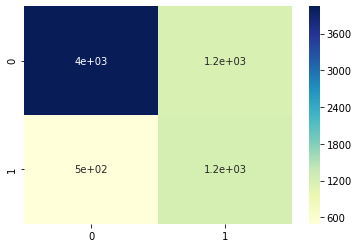

In [378]:
sns.heatmap(confusion_matrix(y_preds,y_test9),annot=True,cmap="YlGnBu")

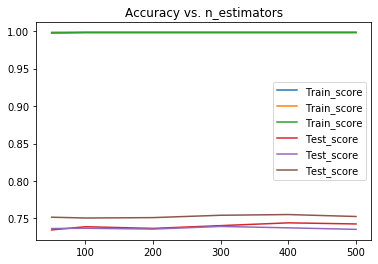

In [379]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_train9, y=y_train9,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                 cv=3)

param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()

### (iv) Personality + Age + Gender + Family Size

In [380]:
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','age','gender','familysize']
X_trainpa,X_testpa,y_trainpa,y_testpa = train_test_split(data[features],
                                                        data.depression_category,
                                                        test_size=0.3)

#### Depression

Try `KFold`.

In [381]:
from sklearn.model_selection import KFold

In [382]:
data_try = data[['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','age','gender','familysize','depression_category']]

In [383]:
data_try.head()

,Extroversion,Agreeableness,Conscientiousness,Emotional_stability,Openness_to_experience,age,gender,familysize,depression_category
0,1,9,9,1,13,16,2,2,1
2,3,7,4,8,10,17,2,3,1
4,4,7,4,4,9,19,2,4,1
6,7,8,10,7,5,17,2,4,1
9,1,1,10,1,5,18,2,3,1


In [384]:
scores = []
rf = RandomForestClassifier()
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','age','gender','familysize']
target = 'depression_category'

cv = KFold(n_splits=10, random_state=42, shuffle=False)

for train_index, test_index in cv.split(data_try):
    
    X_train = data_try.iloc[train_index][features]
    X_test = data_try.iloc[test_index][features]
    y_train = data_try.iloc[train_index][target]
    y_test = data_try.iloc[test_index][target]
    
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [385]:
scores

[0.6812095032397408,
 0.6846652267818575,
 0.6691144708423327,
 0.6803455723542117,
 0.6885529157667387,
 0.6937365010799136,
 0.6997840172786177,
 0.7062634989200864,
 0.6850971922246221,
 0.6894168466522678]

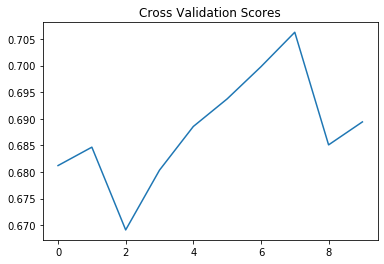

In [386]:
plt.plot(range(len(scores)), scores)
plt.title("Cross Validation Scores")
plt.show()

In [387]:
scores = []
lr = LogisticRegression()
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','age','gender','familysize']
target = 'depression_category'

cv = KFold(n_splits=10, random_state=42, shuffle=False)

for train_index, test_index in cv.split(data_try):
    
    X_train = data_try.iloc[train_index][features]
    X_test = data_try.iloc[test_index][features]
    y_train = data_try.iloc[train_index][target]
    y_test = data_try.iloc[test_index][target]
    
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


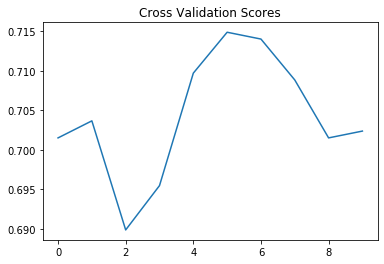

In [388]:
plt.plot(range(len(scores)), scores)
plt.title("Cross Validation Scores")
plt.show()

Grid Search for this assumption.

In [389]:
n_estimators = [100,200,300,400,500]
max_depth = [10,50,100]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [390]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_trainpa, y_trainpa)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [391]:
y_predpa = rf_random.predict(X_testpa)

In [392]:
accuracy_score(y_predpa,y_testpa)

0.7065514758819295

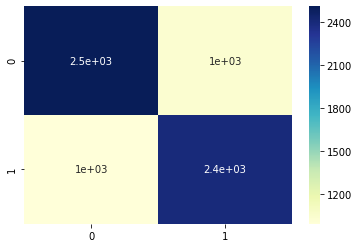

In [393]:
sns.heatmap(confusion_matrix(y_predpa,y_testpa),
            annot=True,cmap="YlGnBu")

In [394]:
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [395]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_trainpa, y_trainpa)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [396]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [397]:
y_predd = rf_random.predict(X_testpa)

In [398]:
accuracy_score(y_predd,y_testpa)

0.7087113030957524

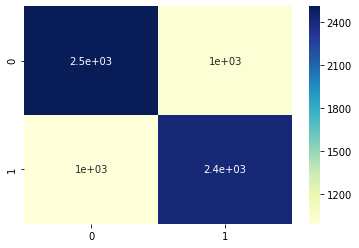

In [399]:
sns.heatmap(confusion_matrix(y_predd,y_testpa),
            annot=True,cmap="YlGnBu")

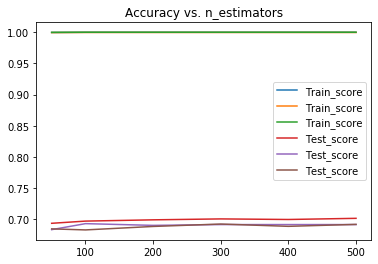

In [400]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_trainpa, y=y_trainpa,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                 cv=3)

param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()

#### Anxiety

In [401]:
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','age','gender','familysize']
X_trainpaa,X_testpaa,y_trainpaa,y_testpaa = train_test_split(data[features],
                                                        data.anxiety_category,
                                                        test_size=0.3)

In [402]:
random_grid = {'C':c,
               'penalty':penalty
}

In [403]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_trainpaa, y_trainpaa)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.6s


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [404]:
y_preda = lr_random.predict(X_testpaa)

In [405]:
accuracy_score(y_preda,y_testpaa)

0.714902807775378

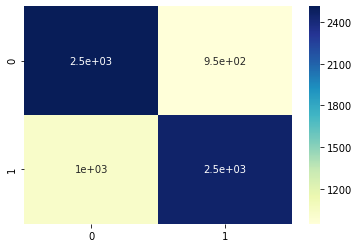

In [406]:
sns.heatmap(confusion_matrix(y_preda,y_testpaa),
            annot=True,cmap="YlGnBu")

In [407]:
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [408]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_trainpaa, y_trainpaa)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [409]:
y_preda = rf_random.predict(X_testpaa)

In [410]:
accuracy_score(y_testpaa,y_preda)

0.7071274298056156

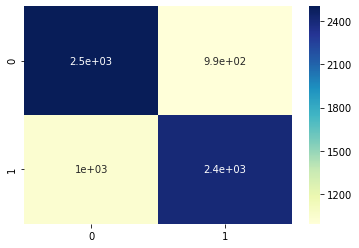

In [411]:
sns.heatmap(confusion_matrix(y_preda,y_testpaa),
            annot=True,cmap="YlGnBu")

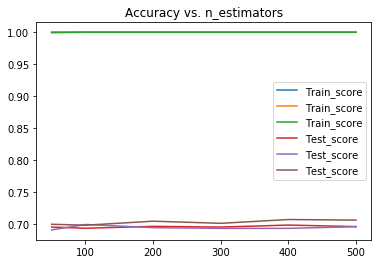

In [412]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_trainpaa, y=y_trainpaa,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                 cv=3)

param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()

#### Stress

In [413]:
features = ['Extroversion','Agreeableness',
            'Conscientiousness','Emotional_stability',
           'Openness_to_experience','age','gender','familysize']
X_trainpas,X_testpas,y_trainpas,y_testpas = train_test_split(data[features],
                                                        data.anxiety_category,
                                                        test_size=0.3)

In [414]:
random_grid = {'C':c,
               'penalty':penalty
}

In [415]:
lr = LogisticRegression()
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
lr_random.fit(X_trainpas, y_trainpas)

/Users/jinxiaowei/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  24 | elapsed:    0.1s remaining:    0.6s


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [416]:
y_preds = lr_random.predict(X_testpas)

In [417]:
accuracy_score(y_preds,y_testpas)

0.7022318214542836

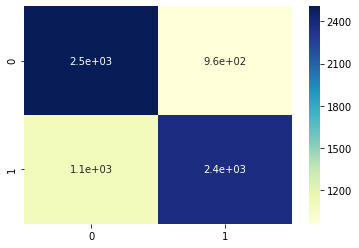

In [418]:
sns.heatmap(confusion_matrix(y_preds,y_testpas),
            annot=True,cmap="YlGnBu")

In [419]:
n_estimators = [100,200,300,400,500]

# Maximum number of levels in tree
max_depth = [10,50,100]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2]}


In [420]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_trainpas, y_trainpas)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [421]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10}

In [422]:
y_preds = rf_random.predict(X_testpas)

In [423]:
accuracy_score(y_preds,y_testpas)

0.6993520518358531

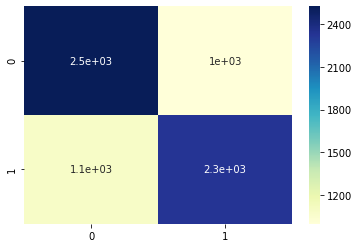

In [424]:
sns.heatmap(confusion_matrix(y_preds,y_testpas),
            annot=True,cmap="YlGnBu")

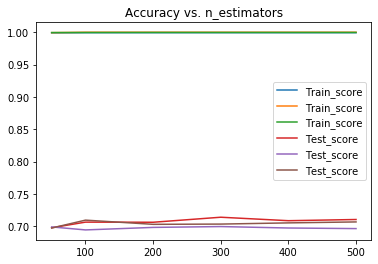

In [425]:
train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X=X_trainpas, y=y_trainpas,
                                                param_name='n_estimators',
                                                param_range=[50,100,200,300,400,500],
                                                 cv=3)

param_range=[50,100,200,300,400,500]
plt.plot(param_range, train_scoreNum,label='Train_score')
plt.plot(param_range, test_scoreNum,label='Test_score')
plt.legend()
plt.title("Accuracy vs. n_estimators")
plt.show()